## Reto 3: Dataset de entrenamiento y de prueba

### 1. Objetivos:
    - Aplicar la técnica de división del dataset en entrenamiento y prueba para entrenar un modelo de Regresión Linear Múltiple
 
---
    
### 2. Desarrollo:

Para este Reto vamos a utilizar el dataset 'wine_quality_red-clean.csv'. Este dataset tiene muchas variables numéricas. Realiza los procesos que se enumeran a continuación. Explica paso a paso tu proceso para que puedas presentarlo a los demás.

1. Explora las correlaciones que existen entre estas variables.
2. Elige dos o más variables independientes y una variable dependiente.
3. Explora las variables que elegiste para asegurarte de que estén limpias y de que no haya valores atípicos que puedan arruinar el modelo.
4. Separa tus datos en dataset de entrenamiento y prueba usando `scikit-learn`.
5. Entrena un modelo de Regresión Lineal Múltiple con tu dataset de entrenamiento.
6. Evalúa tu modelo usando el dataset de prueba.
7. Si crees que una combinación de variables pueda obtener mejor resultado, repite y el proceso.
8. Presenta tus hallazgos a tus compañeros.

#REGRESIÓN LINEAL SIMPLE
Realizaremos una regresión lineal para algunas variables del dataset que contiene datos de mujeres con o sin diabetes  de la comunidad indigena Pima. 

Más información sobre el dataset en: 
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/BEDU_DS/FASE_3/Remoto Datasets/Remoto wine_quality_red-clean.csv", index_col=0)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##Buscamos correlaciones entre nuestras variables. 
Para ello hacemos uso de un heatmap de la matriz de correlaciones.

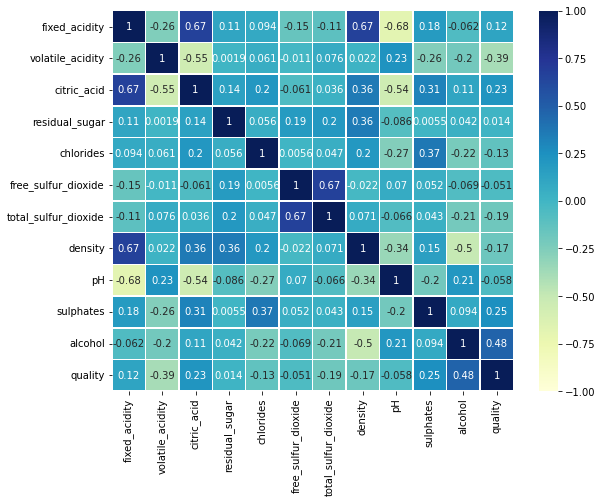

In [5]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)

In [6]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Importamos las funciones para dividir nuestros datos en una muestra para entrenar el modelo lineal y otra para hacer la prueba.


##Implementación del modelo lineal

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Definimos nuestras variables independientes y la variable dependiente en base de la correlación existente.

In [8]:
x=df[["fixed_acidity", "citric_acid"]]
y=df["pH"]

Dividimos nuestros datos en una muestra para entrenar y otra muestra para hacer la prueba.

In [9]:
X_training, X_test, y_training, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)
lr=LinearRegression()
lr.fit(X_training, y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##score

Calculamos el score

In [10]:
lr.score(X_test, y_test)

0.47424812108712083

In [11]:
lr.score(x, y)

0.47764911118693226

## Eliminar valores atipicos

Primero notemos que la variable fixed acidity tiene varios valores atipicos, por lo que podemos aplicarle un filtro y quedarnos con los valores más representativos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


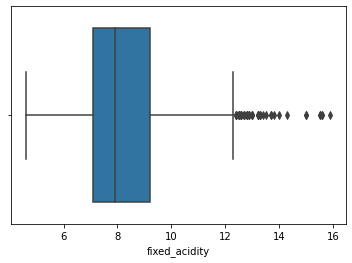

In [12]:
sns.boxplot(df["fixed_acidity"])

In [13]:
iqr = df['fixed_acidity'].quantile(0.75) - df['fixed_acidity'].quantile(0.25) 
filtro_inferior = df['fixed_acidity'] > df['fixed_acidity'].quantile(0.25) - (iqr * 1.5) 
filtro_superior = df['fixed_acidity'] < df['fixed_acidity'].quantile(0.75) + (iqr * 1.5)
df_filtrado = df[filtro_inferior & filtro_superior]


De igual forma limpiamos la variable pH 

In [14]:
iqr = df_filtrado['pH'].quantile(0.75) - df_filtrado['pH'].quantile(0.25) 
filtro_inferior = df_filtrado['pH'] > df_filtrado['pH'].quantile(0.25) - (iqr * 1.5) 
filtro_superior = df_filtrado['pH'] < df_filtrado['pH'].quantile(0.75) + (iqr * 1.5)
df_filtrado = df_filtrado[filtro_inferior & filtro_superior]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


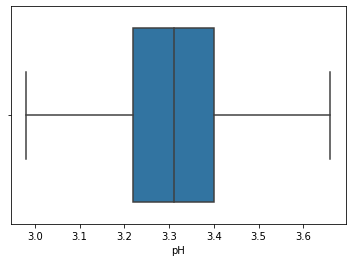

In [15]:
sns.boxplot(df_filtrado["pH"])

Veamos cuantos valores hemos eliminado, nuestro dataset original tenía 1599 registros, ahora tenemos 1505, lo cual no es mucha diferencia y tenemos la ventaja de que ahora nuestros registros son mas representativos.

In [16]:
df_filtrado.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000
mean,8.197409,0.529701,0.263542,2.535282,0.087458,15.988040,46.459801,0.996676,3.314724,0.650638,10.393056,5.625249
std,1.477153,0.179537,0.187651,1.425299,0.045507,10.535205,33.054610,0.001727,0.132720,0.153010,1.027027,0.804178
min,5.000000,0.120000,0.000000,1.200000,0.012000,1.000000,6.000000,0.990200,2.980000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.100000,6.000000
75%,9.100000,0.640000,0.410000,2.600000,0.090000,22.000000,62.000000,0.997740,3.400000,0.720000,11.000000,6.000000
max,12.300000,1.580000,0.780000,15.500000,0.611000,72.000000,289.000000,1.003690,3.660000,1.610000,14.000000,8.000000


##Implementación del modelo lineal a las variables filtradas

Ahora realizamos la regresion lineal para nuestras variables ya filtradas.

In [17]:
x_1=df_filtrado[["fixed_acidity", "citric_acid"]]
y_1=df_filtrado["pH"]
X_training2, X_test2, y_training2, y_test2 = train_test_split(x_1, y_1, test_size=0.3, shuffle=True)
lr=LinearRegression()
lr.fit(X_training2, y_training2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lr.score(X_test2, y_test2)

0.4532112701759985

##Validación cruzada 

In [19]:
from sklearn.model_selection import cross_validate

In [20]:
scores=cross_validate(lr,x,y,scoring="r2")

In [21]:
scores  

{'fit_time': array([0.00386214, 0.00266004, 0.00148106, 0.00149703, 0.00140405]),
 'score_time': array([0.00164557, 0.00093079, 0.00088954, 0.00084162, 0.00084853]),
 'test_score': array([0.37130828, 0.4277382 , 0.45236338, 0.40719942, 0.42158427])}

In [22]:
scores["test_score"]

array([0.37130828, 0.4277382 , 0.45236338, 0.40719942, 0.42158427])